<a href="https://colab.research.google.com/github/OinamChitaranjan/Churn_Prediction/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [10]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [12]:
x= df.drop(columns=['Exited'])
y= df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.shape

(8000, 11)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train= scaler.fit_transform(x_train)
import joblib
joblib.dump(scaler,'scaler.pkl')
x_test= scaler.transform(x_test)

In [15]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras .layers import Dense


In [17]:
model= Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(9,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.3,patience=3,verbose=1,mode='min',min_delta=1e-4,cooldown=2,min_lr=1e-6)
history =model.fit(x_train,y_train,epochs=14,validation_split=0.2,callbacks=[reduce_lr])

Epoch 1/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7115 - loss: 0.6276 - val_accuracy: 0.7987 - val_loss: 0.4805 - learning_rate: 0.0010
Epoch 2/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7958 - loss: 0.4725 - val_accuracy: 0.8169 - val_loss: 0.4342 - learning_rate: 0.0010
Epoch 3/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8213 - loss: 0.4265 - val_accuracy: 0.8231 - val_loss: 0.4143 - learning_rate: 0.0010
Epoch 4/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8278 - loss: 0.4097 - val_accuracy: 0.8263 - val_loss: 0.4078 - learning_rate: 0.0010
Epoch 5/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.4147 - val_accuracy: 0.8256 - val_loss: 0.4033 - learning_rate: 0.0010
Epoch 6/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8327 - loss: 0.4035 - val_accuracy: 0.8269 - val_loss: 0.3999 - learning_rate: 0.0010
Epoch 7/14
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3949 - 

In [19]:
model.layers[0].get_weights()

[array([[-0.16232613, -0.03633507,  0.2818363 , -0.14852549, -0.20566665,
          0.30095154,  0.01354899,  0.14836335,  0.40891898,  0.07146996,
         -0.10446865],
        [-0.496865  , -0.7886821 , -0.2931076 ,  0.04962321,  0.5389796 ,
          0.23080845,  0.17726058, -0.90913904, -0.17943461, -0.02979998,
          0.07919183],
        [ 0.45931053, -0.19647464, -0.03695044,  0.24225521, -0.06697333,
         -0.20720418,  0.12276094, -0.01401747, -0.1707562 , -0.02948012,
         -0.19710806],
        [ 0.21704777, -0.451952  , -0.21674661, -0.6625301 , -0.3083855 ,
         -0.257162  ,  0.00495629,  0.14307576, -0.18990646, -0.5479388 ,
          0.44170204],
        [-0.21450038, -0.08975483,  0.75353265, -0.13392194, -0.41415828,
         -0.20849524,  0.66732913, -0.14348485, -0.15483615, -1.1402621 ,
         -0.18315834],
        [ 0.5863987 , -0.08501466,  0.28171307, -0.06675325, -0.5353105 ,
          0.5873011 , -0.07236912, -0.1627224 , -0.36985984, -0.0042666

In [20]:
y_log=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [21]:
y_pred=np.where(y_log>0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.855

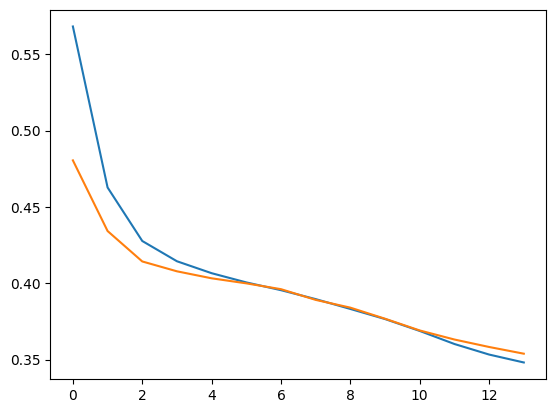

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



In [26]:
import gradio as gr
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
scalar=joblib.load('scaler.pkl')

def preprocess(CreditScore,Age,Tenure,Balance,NumOfProducts,
               HasCrCard,IsActiveMember,EstimatedSalary,
               geography,gender):
  df=pd.DataFrame({"CreditScore":[CreditScore], "Age":[Age],"Tenure":[Tenure],"Balance":[Balance],"NumOfProducts":[NumOfProducts],"HasCrCard":[int(HasCrCard)], "IsActiveMember":[int(IsActiveMember)],
  "EstimatedSalary":[EstimatedSalary],
  "Geography":[geography],
  "Gender":[gender]})
  df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=False)
  expexted_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']
  for col in expexted_cols:
    if col not in df.columns:
      df[col]=0
  df=df[expexted_cols]
  Scaled=scalar.transform(df)
  return Scaled
def predict(CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrcard,IsActiveMember,EstimatedSalary,Geography,Gender):
  X = preprocess(CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrcard,IsActiveMember,EstimatedSalary,Geography,Gender)
  prob =model.predict(X)[0][0]
  if(prob>0.5):
    prob=1
  else:
    prob=0
  if prob==0:
   return"not Excited"
  else:
   return"Excited"


iface=gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Credit Score"),
        gr.Slider(18,100,step=1,label="Age"),
        gr.Number(label="Tenure"),
        gr.Number(label="Balance"),
        gr.Number(label="Number of Products"),
        gr.Checkbox(label="has Credit Card"),
        gr.Checkbox(label="is Active Member"),
        gr.Number(label="Estimated Salary"),
        gr.Dropdown(["france","Germany","Spain"],label="Geography"),
        gr.Radio(["Male","Female"],label="Gender")],
    outputs=gr.Textbox(label="Churn Probility"),
    title="Chuen Prediction Demo"
)
iface.launch(share=True,debug=True)






Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://fde083714a19475ac2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fde083714a19475ac2.gradio.live
